# S03 T01 Ex03: Visualització gràfica d'un dataset
## Luis Pardina - Data Science - 13/abr/2022
### Exercici 3: Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

***Exercici 1***: Descarrega el data set Airlines Delay: *Airline on-time statistics and delay causes* i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [2]:
import numpy as np
from IPython.display import Image
import pandas as pd
rawtable = pd.read_csv('DelayedFlights.csv', index_col=0)

C:\Users\chufl\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Examino la base de dades i trec informació sobre les seves caractrístiques:

In [3]:
pd.set_option('display.max_columns',None)
rawtable.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
rawtable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

### Contingut:

El dataframe té 1.936.758 entries (files) i 29 columnes.

El dataframe contè como a **dades numèriques**: any, mes i dia del vol, el numero del vol, l'hora d'arribada i l'hora de sortida previstes i reals (com a numero float o sencer), la durada en minuts del vol prevista i real, els retards en minuts a la sortida i a l'arribada, si el vol ha estat cancel.lat o desviat (0 o 1), un desglossament del temps de vol en minuts en aproximació a la pista + temps a l'aire + sortida de la pista i un desglossament del retard a l'arribada en minuts en les seves causes (companyia, metereologia, aeroport, seguretat, arribada del vol anterior). S'observa que aquest darrer desglossament nomès es fa a vegades, i hi ha valors nuls (np.nan).

Com a **dades categòriques** el dataframe conté la companyia que opera, un codi del numero de vol, origen i destinació del vol i la raó de la cancel.lació.

Treuré les columnes de la 23 a la 28 que contenen informació no rellevant i em genero una nova dataframe. També trec els duplicats:

In [5]:
flights = rawtable.iloc[:,0:24].copy()
flights.drop_duplicates(inplace = True)
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0
10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0
15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0


***Exercici 2***: Fes un informe complet del data set.
    - Resumeix estadísticament les columnes d’interès
    - Troba quantes dades faltants hi ha per columna
    - Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
    - Taula de les aerolínies amb més endarreriments acumulats
    - Quins són els vols més llargs? I els més endarrerits?
    - Etc.


Analitzo quines dades faltants hi ha per columna:

In [6]:
flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
dtype: int64

Visualitzo les files on el temps de vol o el temps a l'aire o el retràs no estàn informats (son nuls). Vull comprovar si es tracta de les mateixes 8387 instancies

In [7]:
flights[flights['ActualElapsedTime'].isnull() | flights['AirTime'].isnull() | flights['ArrDelay'].isnull() ]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
1763,2008,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,NaN,95.0,NaN,NaN,7.0,SAN,SMF,480,NaN,12.0,0,N,1
1911,2008,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,NaN,90.0,NaN,NaN,265.0,SFO,SAN,447,NaN,11.0,0,N,1
2651,2008,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,NaN,65.0,NaN,NaN,44.0,BOI,RNO,335,NaN,11.0,0,N,1
2726,2008,1,4,5,737.0,705,NaN,825,WN,178,N718SW,NaN,80.0,NaN,NaN,32.0,BUR,SMF,358,NaN,13.0,0,N,1
3672,2008,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,NaN,85.0,NaN,NaN,139.0,LAS,RNO,345,NaN,12.0,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006289,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,N914DN,NaN,123.0,NaN,NaN,12.0,ATL,BUF,712,NaN,37.0,1,A,0
7006401,2008,12,11,4,1355.0,1106,7.0,1950,DL,26,N3747D,NaN,344.0,NaN,NaN,169.0,LAX,JFK,2475,13.0,17.0,0,N,1
7006809,2008,12,11,4,1026.0,955,NaN,1219,DL,892,N928DL,NaN,144.0,NaN,NaN,31.0,ATL,JFK,760,NaN,NaN,1,A,0
7007034,2008,12,11,4,1527.0,1520,2106.0,1708,DL,1102,N924DL,NaN,108.0,NaN,NaN,7.0,IAD,ATL,533,9.0,19.0,0,N,1


Comprovo una hipotesi: es tracta dels vols cancel.lats o desviats (amb incidències).

In [8]:
#filtrat per vols desviats o vols cancel.lats:
flights[(flights['Diverted'] == 1) | (flights['Cancelled'] == 1)].isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 2
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
dtype: int64

Histograma del vols amb incidències per a cada companyia:

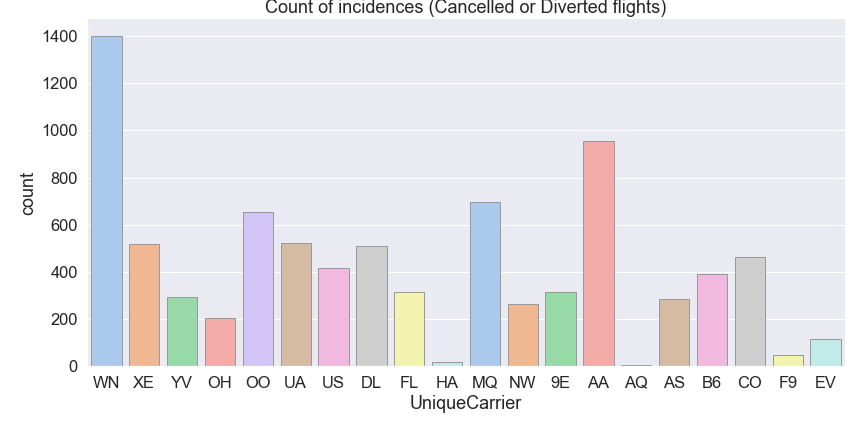

In [9]:
Image("01_incidencies.png")

Decideixo per a continuar l'anàlisi extreure totes les files que tenen un resultat buit, que son els vols cancel.lats o desviats

In [10]:
flights = flights.dropna(how='any')
flights.isnull().sum()      #comprovació de que ja no queden buits

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

Resum estadístic de les colummnes de més interès i histograma dels retards:

In [11]:
flights[['ActualElapsedTime','CRSElapsedTime','ArrDelay', 'Distance']].describe()

,ActualElapsedTime,CRSElapsedTime,ArrDelay,Distance
count,1.928366e+06,1.928366e+06,1.928366e+06,1.928366e+06
mean,1.333059e+02,1.341977e+02,4.219977e+01,7.649492e+02
std,7.206015e+01,7.123347e+01,5.678449e+01,5.738864e+02
min,1.400000e+01,-2.100000e+01,-1.090000e+02,1.100000e+01
25%,8.000000e+01,8.200000e+01,9.000000e+00,3.380000e+02
50%,1.160000e+02,1.160000e+02,2.400000e+01,6.060000e+02
75%,1.650000e+02,1.650000e+02,5.600000e+01,9.970000e+02
max,1.114000e+03,6.600000e+02,2.461000e+03,4.962000e+03


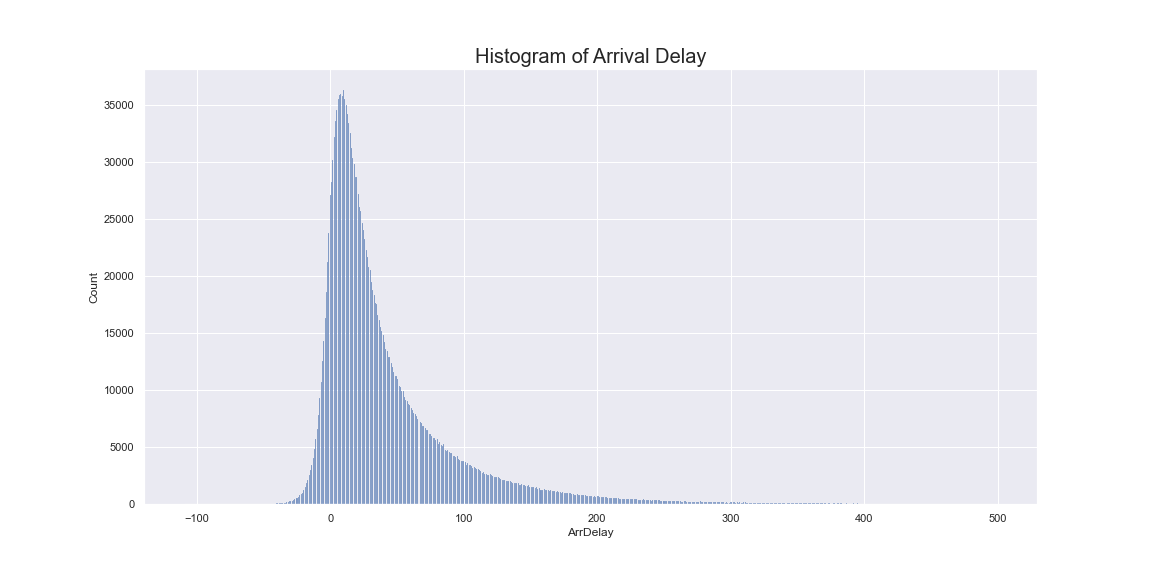

In [12]:
Image("02_hist_retards.png")

Afegeixo dues columnes al df amb velocitat i un categoric sobre si s'ha endarrerit o no

In [13]:
flights['FlightSpeed'] = flights['Distance'] / (flights['ActualElapsedTime'] / 60)
flights['FlightDelayed'] = flights['ArrDelay'].apply(lambda x: 'Delayed' if x >= 0 else 'On time')
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,FlightSpeed,FlightDelayed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,379.687500,On time
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,379.687500,Delayed
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,321.875000,Delayed
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,343.333333,Delayed
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,408.712871,Delayed
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,397.750000,Delayed
10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,382.153846,Delayed
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,410.578512,Delayed
15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,186.923077,Delayed
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,391.842105,Delayed


Faig una agrupació per companyia aeria per a veure la suma (acumulada) de minuts de retard, ordenada de major a menor

In [14]:
a = flights[flights['ArrDelay']>0].groupby('UniqueCarrier')    #agafo només quan hi ha hagut retard
a['ArrDelay'].agg([np.sum]).sort_values('sum',ascending=False)

,sum
UniqueCarrier,
WN,11609347.0
AA,9007400.0
UA,6850031.0
MQ,6443938.0
OO,6019322.0
XE,5227263.0
DL,4620911.0
CO,4159659.0
EV,3920352.0


Mirem també la mitja del retard dels vols per companyia, ordenats de la mitja més gran a la més petita

In [15]:
b= flights.groupby('UniqueCarrier')      #agafo totes les dades, també quan el vol ha estat puntual (delay <=0)
b['ArrDelay'].agg([np.mean, max, min]).sort_values('mean',ascending=False)

,mean,max,min
UniqueCarrier,,,
YV,55.287049,606.0,-39.0
B6,55.088739,834.0,-59.0
OH,51.013250,955.0,-66.0
XE,50.181217,838.0,-42.0
UA,47.784399,1322.0,-70.0
EV,47.554255,940.0,-47.0
9E,46.936453,1143.0,-42.0
AA,46.561553,1525.0,-63.0
OO,45.370587,990.0,-37.0


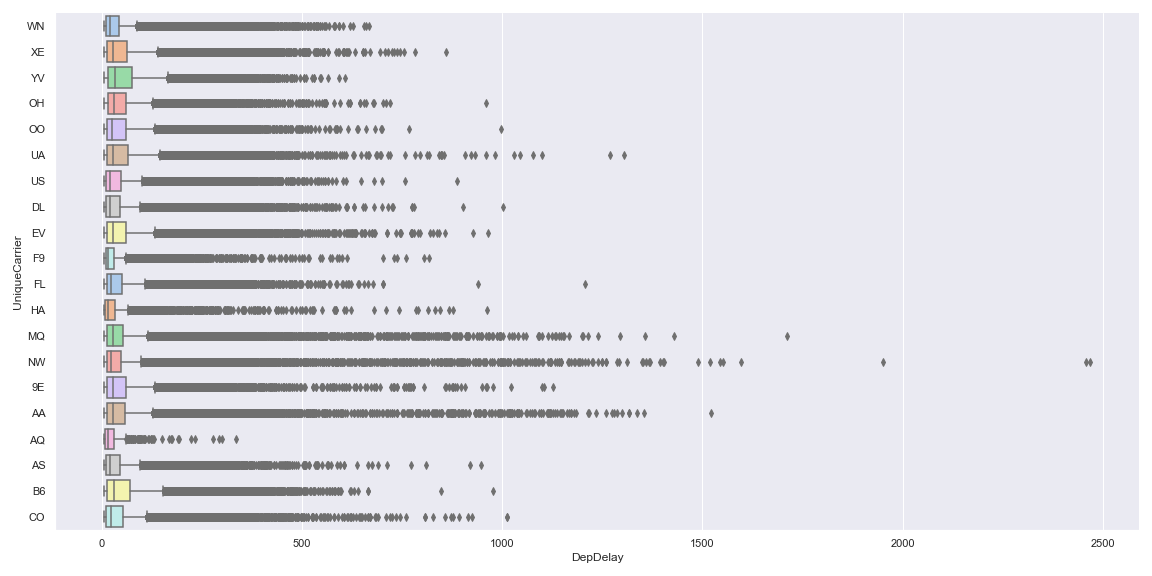

In [16]:
Image("03_boxplot_depdelay_bycarrier.png")

Vols ordenats de la durada màxima més llarga a la durada màxima més petita

In [17]:
vols = flights.groupby(['UniqueCarrier','FlightNum'])
vols['ActualElapsedTime'].agg([max, min, np.mean, np.median, np.std]).sort_values('max',ascending=False)

,,max,min,mean,median,std
UniqueCarrier,FlightNum,,,,,
HA,21,1114.0,319.0,366.109375,354.0,96.339531
CO,15,790.0,597.0,637.958491,633.0,24.519978
DL,151,776.0,359.0,417.052174,410.0,47.499925
HA,28,750.0,295.0,340.428571,332.5,47.278076
AA,5,727.0,443.0,490.239726,486.5,26.138703
...,...,...,...,...,...,...
AQ,261,32.0,29.0,30.500000,30.5,2.121320
HA,129,32.0,24.0,28.000000,28.0,3.651484
AQ,266,32.0,26.0,29.666667,31.0,3.214550


Retard més gran de tots els vols que fa cada companyia al periode de temps considerat

In [18]:
vols['ArrDelay'].agg([max, min, np.mean, np.median, np.std]).sort_values('max',ascending=False)

max   min        mean  median         std
UniqueCarrier FlightNum                                              
NW            808        2461.0 -12.0  159.489362    43.0  422.963709
              1699       2453.0  -6.0  108.725490    27.0  364.806912
              1107       1951.0 -23.0   61.761364    15.5  234.231097
MQ            3538       1707.0 -10.0   50.657143    27.0  146.440784
NW            357        1655.0 -21.0   52.375000    25.0  139.841197
...                         ...   ...         ...     ...         ...
F9            3274        -14.0 -14.0  -14.000000   -14.0         NaN
UA            747         -15.0 -15.0  -15.000000   -15.0         NaN
NW            1787        -16.0 -16.0  -16.000000   -16.0         NaN
MQ            4838        -26.0 -26.0  -26.000000   -26.0         NaN
B6            1987        -33.0 -33.0  -33.000000   -33.0         NaN

[27863 rows x 5 columns]

***Exercici 3***: Exporta el data set net i amb les noves columnes a Excel.

A una worksheet d'excel no hi caben més de 1,048,576 rows, hem de fer dues meitats i ficar-les a dues worksheets

In [17]:
df1 = pd.DataFrame(flights.iloc[0:1000000])
df2 = pd.DataFrame(flights.iloc[1000000:])

df1.to_excel('flights1.xlsx', sheet_name='Sheet1')
df2.to_excel('flights2.xlsx', sheet_name='Sheet1')